# Decision Tree Training

This notebook trains a Decision Tree classifier on the CICIDS2017 intrusion detection dataset.

**Key Features:**
- SMOTE balancing
- Tree complexity analysis
- Feature importance visualization
- Decision rules extraction
- Tree visualization

**Advantages of Decision Trees:**
- Fast training and prediction
- Interpretable results
- Handles non-linear relationships
- No feature scaling required

## 1. Setup and Imports

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Add project root to path
root_dir = os.getcwd().split("AdversarialNIDS")[0] + "AdversarialNIDS"
sys.path.append(root_dir)

from CICIDS2017.dataset import CICIDS2017
from UNSWNB15.dataset import UNSWNB15

from scripts.logger import LoggerManager
from scripts.analysis.model_analysis import perform_model_analysis
from scripts.models.decision_tree.tree_rules import *

from scripts.models.decision_tree.decision_tree import train_decision_tree
from scripts.models.decision_tree.analyze_tree import analyze_tree_complexity 

from scripts.models.model_utils import (
    check_data_leakage,
    get_tree_feature_importance,
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful")

Imports successful


## 2. Initialize Logger

In [2]:
logger = LoggerManager(
    root_dir=root_dir,
    log_name="dt_notebook"
).get_logger()
logger.info("Starting Decision Tree training notebook")

2025-11-26 09:08:01,285 - INFO - Starting Decision Tree training notebook


## 3. Load and Preprocess Data

In [3]:
# Load dataset
logger.info("Loading CICIDS2017 dataset...")
dataset = CICIDS2017(logger=logger).optimize_memory().encode().subset(size=100000, multi_class=True)

2025-11-26 09:08:17,427 - INFO - Loading CICIDS2017 dataset...
2025-11-26 09:08:17,429 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-26 09:08:17,990 - INFO - Loading dataset into DataFrame
2025-11-26 09:08:31,654 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-26 09:08:47,264 - INFO - ============================================================
2025-11-26 09:08:47,265 - INFO - Preprocessing completed successfully
2025-11-26 09:08:47,266 - INFO - Final dimensions: 1,940,693 rows x 71 columns
2025-11-26 09:08:47,266 - INFO - Total rows removed: 273,776 (12.36%)
2025-11-26 09:08:47,266 - INFO - data retention rate: 87.64%
2025-11-26 09:08:47,267 - INFO - ============================================================
2025-11-26 09:08:47,268 - INFO - Optimizing memory usage of the dataset...
2025-11-26 09:08:47,272 - INFO - Initial memory usage: 1066.05 MB
2025-11-26 09:08:48,007 - INFO - Optimized memory usage: 555.24 MB
2025-11-2

## 4. Visualize Class Distribution

In [4]:
dataset.distribution()

2025-11-26 09:08:49,025 - INFO - Calculating data distribution...
2025-11-26 09:08:49,027 - INFO - Data Distribution by Attack Type:
2025-11-26 09:08:49,028 - INFO -   0: 25,000 instances
2025-11-26 09:08:49,029 - INFO -   1: 25,000 instances
2025-11-26 09:08:49,029 - INFO -   2: 25,000 instances
2025-11-26 09:08:49,030 - INFO -   3: 25,000 instances


0    25000
1    25000
2    25000
3    25000
Name: count, dtype: int64

## 5. Data Leakage Check

In [ ]:
#TO_DO
# diagnostics = check_data_leakage(X, y, logger=logger)

## 6. Train/Test Split

In [5]:
# Split data
X_train, X_test, y_train, y_test = dataset.split(test_size=0.2, apply_smote=True)
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

2025-11-26 09:08:58,631 - INFO - Splitting dataset into training and testing sets...
2025-11-26 09:08:59,157 - INFO - Class distribution before SMOTE:
2025-11-26 09:08:59,157 - INFO -   Class 0.0: 20131 samples
2025-11-26 09:08:59,158 - INFO -   Class 1.0: 19890 samples
2025-11-26 09:08:59,159 - INFO -   Class 2.0: 20029 samples
2025-11-26 09:08:59,159 - INFO -   Class 3.0: 19950 samples
2025-11-26 09:08:59,161 - INFO - Class distribution after SMOTE:
2025-11-26 09:08:59,161 - INFO -   Class 0.0: 20131 samples
2025-11-26 09:08:59,162 - INFO -   Class 1.0: 19890 samples
2025-11-26 09:08:59,163 - INFO -   Class 2.0: 20029 samples
2025-11-26 09:08:59,164 - INFO -   Class 3.0: 19950 samples


Train set shape: (80000, 70)
Test set shape: (20000, 70)


## 7. Cross-Validation and training 

In [6]:
# Unpack model and CV scores from train_decision_tree
dt_model, cv_scores = train_decision_tree(
    X_train,
    y_train,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gini',
    max_features=None,
    class_weight='balanced',
    cv_test=False,
    cv=3,
    random_state=0,
    logger=logger
)

if cv_scores!= None:
    print("\n" + "="*50)
    print("CROSS-VALIDATION RESULTS")
    print("="*50)
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    # Plot CV scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', markersize=10, linewidth=2, color='green')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
                label=f'Mean: {cv_scores.mean():.4f}')
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Decision Tree Cross-Validation Scores', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

2025-11-26 09:09:07,946 - INFO - Training Decision Tree on full training set...
2025-11-26 09:09:08,830 - INFO - ==================================================
2025-11-26 09:09:08,831 - INFO - DECISION TREE MODEL
2025-11-26 09:09:08,831 - INFO - ==================================================
2025-11-26 09:09:08,831 - INFO - Parameters: max_depth=3, criterion=gini, min_samples_split=10, min_samples_leaf=5


## 8. Analyze Tree Complexity

2025-11-26 09:10:03,067 - INFO - ==================================================
2025-11-26 09:10:03,068 - INFO - TREE COMPLEXITY ANALYSIS
2025-11-26 09:10:03,069 - INFO - ==================================================
2025-11-26 09:10:03,070 - INFO - Total nodes: 15
2025-11-26 09:10:03,071 - INFO - Leaf nodes: 8
2025-11-26 09:10:03,072 - INFO - Internal nodes: 7
2025-11-26 09:10:03,072 - INFO - Max depth: 3
2025-11-26 09:10:03,073 - INFO - Features used: 7


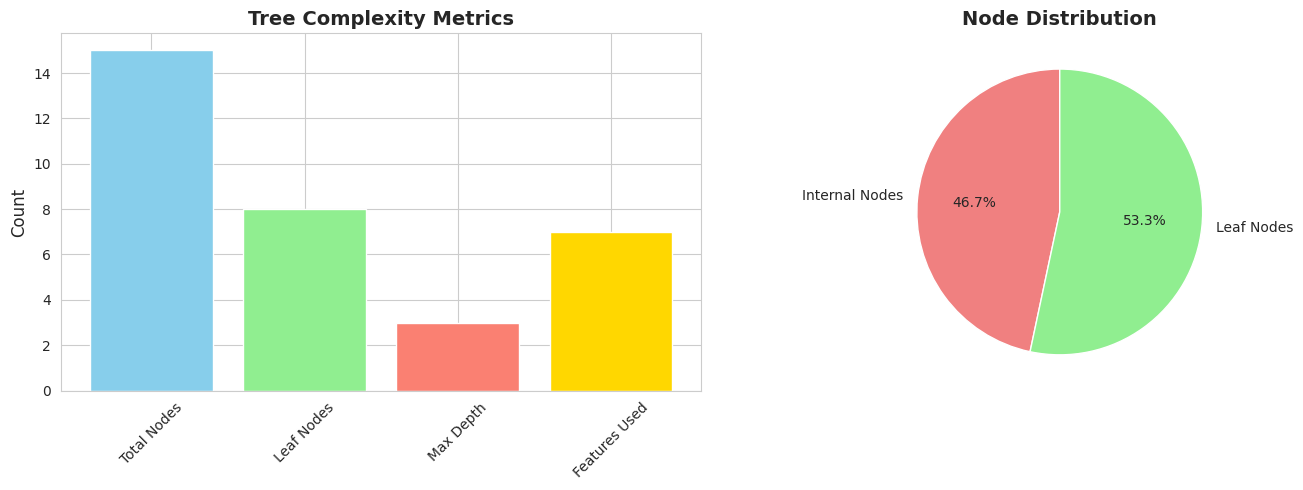

In [8]:
# Analyze tree complexity
complexity = analyze_tree_complexity(dt_model, logger=logger)

# Visualize complexity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of tree metrics
metrics = ['Total Nodes', 'Leaf Nodes', 'Max Depth', 'Features Used']
values = [complexity['n_nodes'], complexity['n_leaves'], 
          complexity['max_depth'], complexity['n_features_used']]

axes[0].bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Tree Complexity Metrics', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart of node distribution
internal_nodes = complexity['n_nodes'] - complexity['n_leaves']
axes[1].pie([internal_nodes, complexity['n_leaves']], 
            labels=['Internal Nodes', 'Leaf Nodes'],
            autopct='%1.1f%%', startangle=90,
            colors=['lightcoral', 'lightgreen'])
axes[1].set_title('Node Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 9. Evaluate on Test Set and Confusion Matrix

2025-11-26 09:10:35,739 - INFO - Running analysis for scikit-learn model: DecisionTree


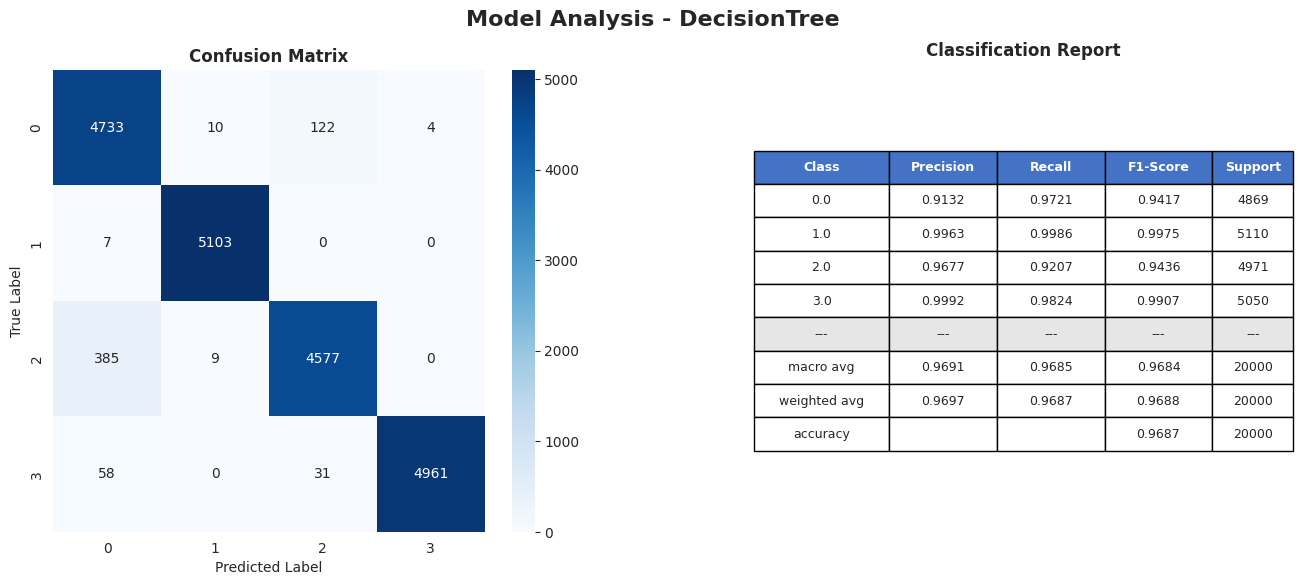

In [11]:
# Evaluate model
cm, cr = perform_model_analysis(
    model=dt_model,
    X_test=X_test,
    y_test=y_test,
    logger=logger,
    title="DecisionTree",
    root_dir=root_dir,
    plot=True
)

## 10. Feature Importance Analysis

2025-11-26 09:10:40,322 - INFO - Top 15 most important features:
2025-11-26 09:10:40,323 - INFO - 1. Subflow Fwd Bytes: 0.2850
2025-11-26 09:10:40,324 - INFO - 2. Bwd Packet Length Std: 0.2668
2025-11-26 09:10:40,324 - INFO - 3. Fwd Packet Length Max: 0.2537
2025-11-26 09:10:40,325 - INFO - 4. Total Length of Fwd Packets: 0.0996
2025-11-26 09:10:40,325 - INFO - 5. Flow Bytes/s: 0.0748
2025-11-26 09:10:40,326 - INFO - 6. Destination Port: 0.0182
2025-11-26 09:10:40,327 - INFO - 7. ACK Flag Count: 0.0018
2025-11-26 09:10:40,327 - INFO - 8. Flow Duration: 0.0000
2025-11-26 09:10:40,328 - INFO - 9. Total Fwd Packets: 0.0000
2025-11-26 09:10:40,329 - INFO - 10. Total Backward Packets: 0.0000
2025-11-26 09:10:40,329 - INFO - 11. Total Length of Bwd Packets: 0.0000
2025-11-26 09:10:40,330 - INFO - 12. Fwd Packet Length Min: 0.0000
2025-11-26 09:10:40,330 - INFO - 13. Fwd Packet Length Mean: 0.0000
2025-11-26 09:10:40,331 - INFO - 14. Fwd Packet Length Std: 0.0000
2025-11-26 09:10:40,331 - INF

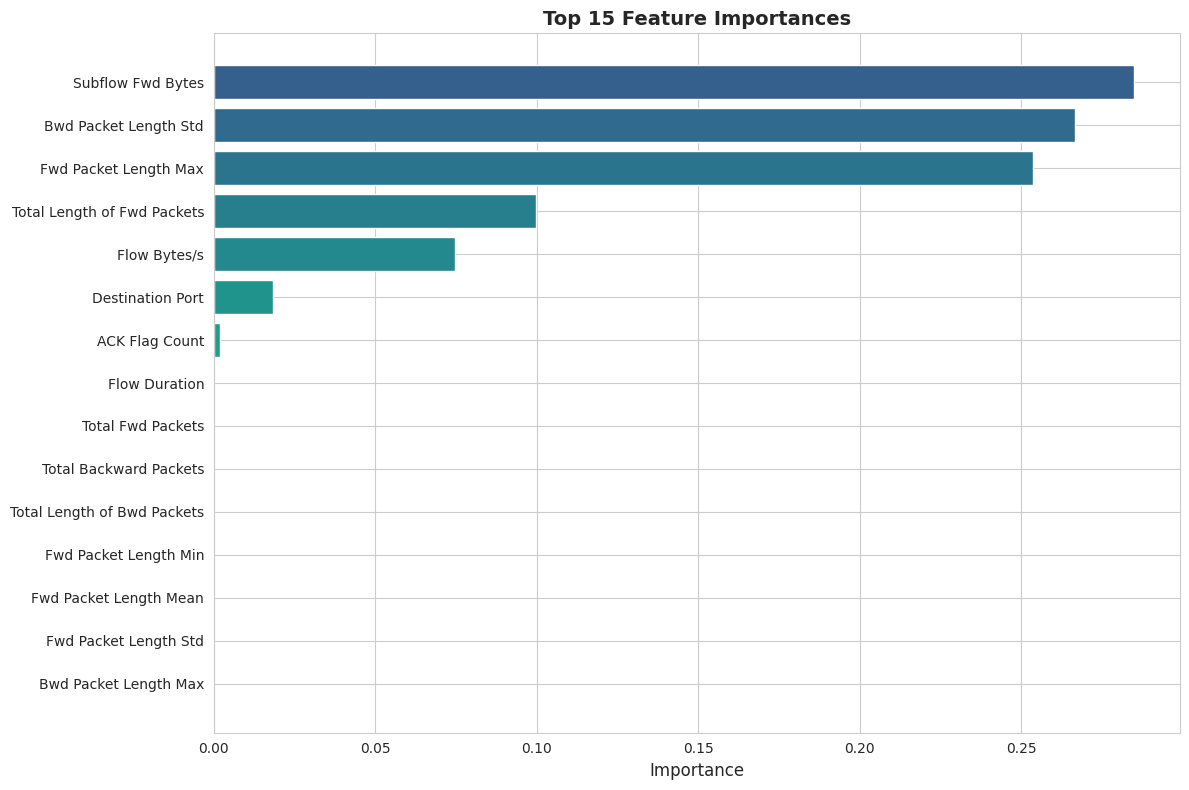

In [12]:
# Get feature importance
top_features = get_tree_feature_importance(
    dt_model,
    feature_names=list(dataset.data.columns),
    top_n=15,
    logger=logger
)

# Plot feature importance
features, importances = zip(*top_features)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(features)))
plt.barh(range(len(features)), importances, color=colors)
plt.yticks(range(len(features)), features)
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 16. Extract Decision Rules

In [ ]:
# Use the correct feature names: drop the label column (e.g., 'Attack Type') if present
feature_names = list(dataset.features.columns)
rules = get_tree_rules(dt_model, feature_names, max_depth=3)

print("\n" + "="*70)
print("DECISION RULES (Top 3 Levels)")
print("="*70)
print(rules)
print("\n... (tree continues deeper)")


DECISION RULES (Top 3 Levels)
|--- Subflow Fwd Bytes <= 3.00
|   |--- Flow Bytes/s <= 1925.63
|   |   |--- Destination Port <= 425.00
|   |   |   |--- class: 2.0
|   |   |--- Destination Port >  425.00
|   |   |   |--- class: 0.0
|   |--- Flow Bytes/s >  1925.63
|   |   |--- ACK Flag Count <= 0.50
|   |   |   |--- class: 3.0
|   |   |--- ACK Flag Count >  0.50
|   |   |   |--- class: 2.0
|--- Subflow Fwd Bytes >  3.00
|   |--- Fwd Packet Length Max <= 21.00
|   |   |--- Total Length of Fwd Packets <= 19.50
|   |   |   |--- class: 0.0
|   |   |--- Total Length of Fwd Packets >  19.50
|   |   |   |--- class: 1.0
|   |--- Fwd Packet Length Max >  21.00
|   |   |--- Bwd Packet Length Std <= 1298.21
|   |   |   |--- class: 0.0
|   |   |--- Bwd Packet Length Std >  1298.21
|   |   |   |--- class: 2.0


... (tree continues deeper)


## Tips for Improving Decision Tree Performance

### To Reduce Overfitting:
1. **Limit max_depth** - Prevents very deep, overfit trees
2. **Increase min_samples_split** - Requires more samples before splitting
3. **Increase min_samples_leaf** - Requires more samples at leaf nodes
4. **Use max_features** - Adds randomness (closer to Random Forest)
5. **Prune the tree** - Post-pruning using cost complexity pruning

### To Improve Performance:
1. **Use Random Forest** - Ensemble of trees usually performs better
2. **Try criterion='entropy'** - May work better than 'gini' for some datasets
3. **Feature engineering** - Create more informative features
4. **Handle class imbalance** - Use class_weight='balanced' or SMOTE
5. **Grid search** - Find optimal hyperparameters

### Interpretability vs Performance:
- **Shallow trees** (depth 5-10): More interpretable, may underfit
- **Deep trees** (depth 20+): Better performance, less interpretable, may overfit
- **Random Forest**: Best performance, harder to interpret